In [1]:
import ramanchada2 as rc2
import matplotlib.pyplot as plt

<AxesSubplot: >

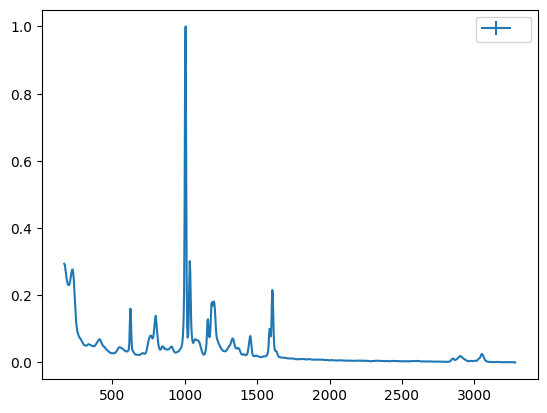

In [2]:
prefix = '/data/RamanSpe/FNMT-Madrid/Horiba_785nm/PST/'
spe = rc2.spectrum.from_local_file(prefix + 'PST10_iR785_OP01_8000msx8.txt', filetype='txt')
spe = spe.normalize()
spe.plot()

(-0.1, 0.5)

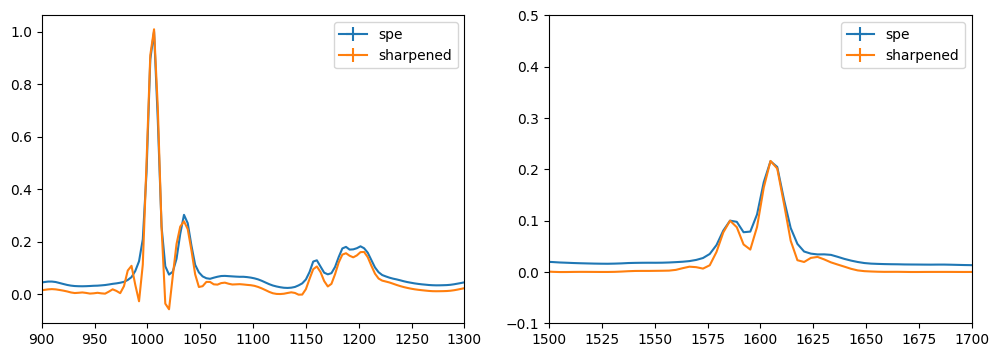

In [3]:
kw_sharpening = dict(filter_fraction=1, sig_width=.4, der2_factor=0, der4_factor=.1)
sharpened = spe.subtract_moving_minimum(60).normalize().derivative_sharpening(**kw_sharpening)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, label='spe')
    sharpened.plot(ax=a, label='sharpened')
ax[0].set_xlim(900, 1300)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .5)

In [4]:
peak_candidates = spe.find_peak_multipeak(sharpening='hht', strategy='topo')

Mode 5, Iteration 600
0 minima > 0; 16 maxima < 0.


<AxesSubplot: >

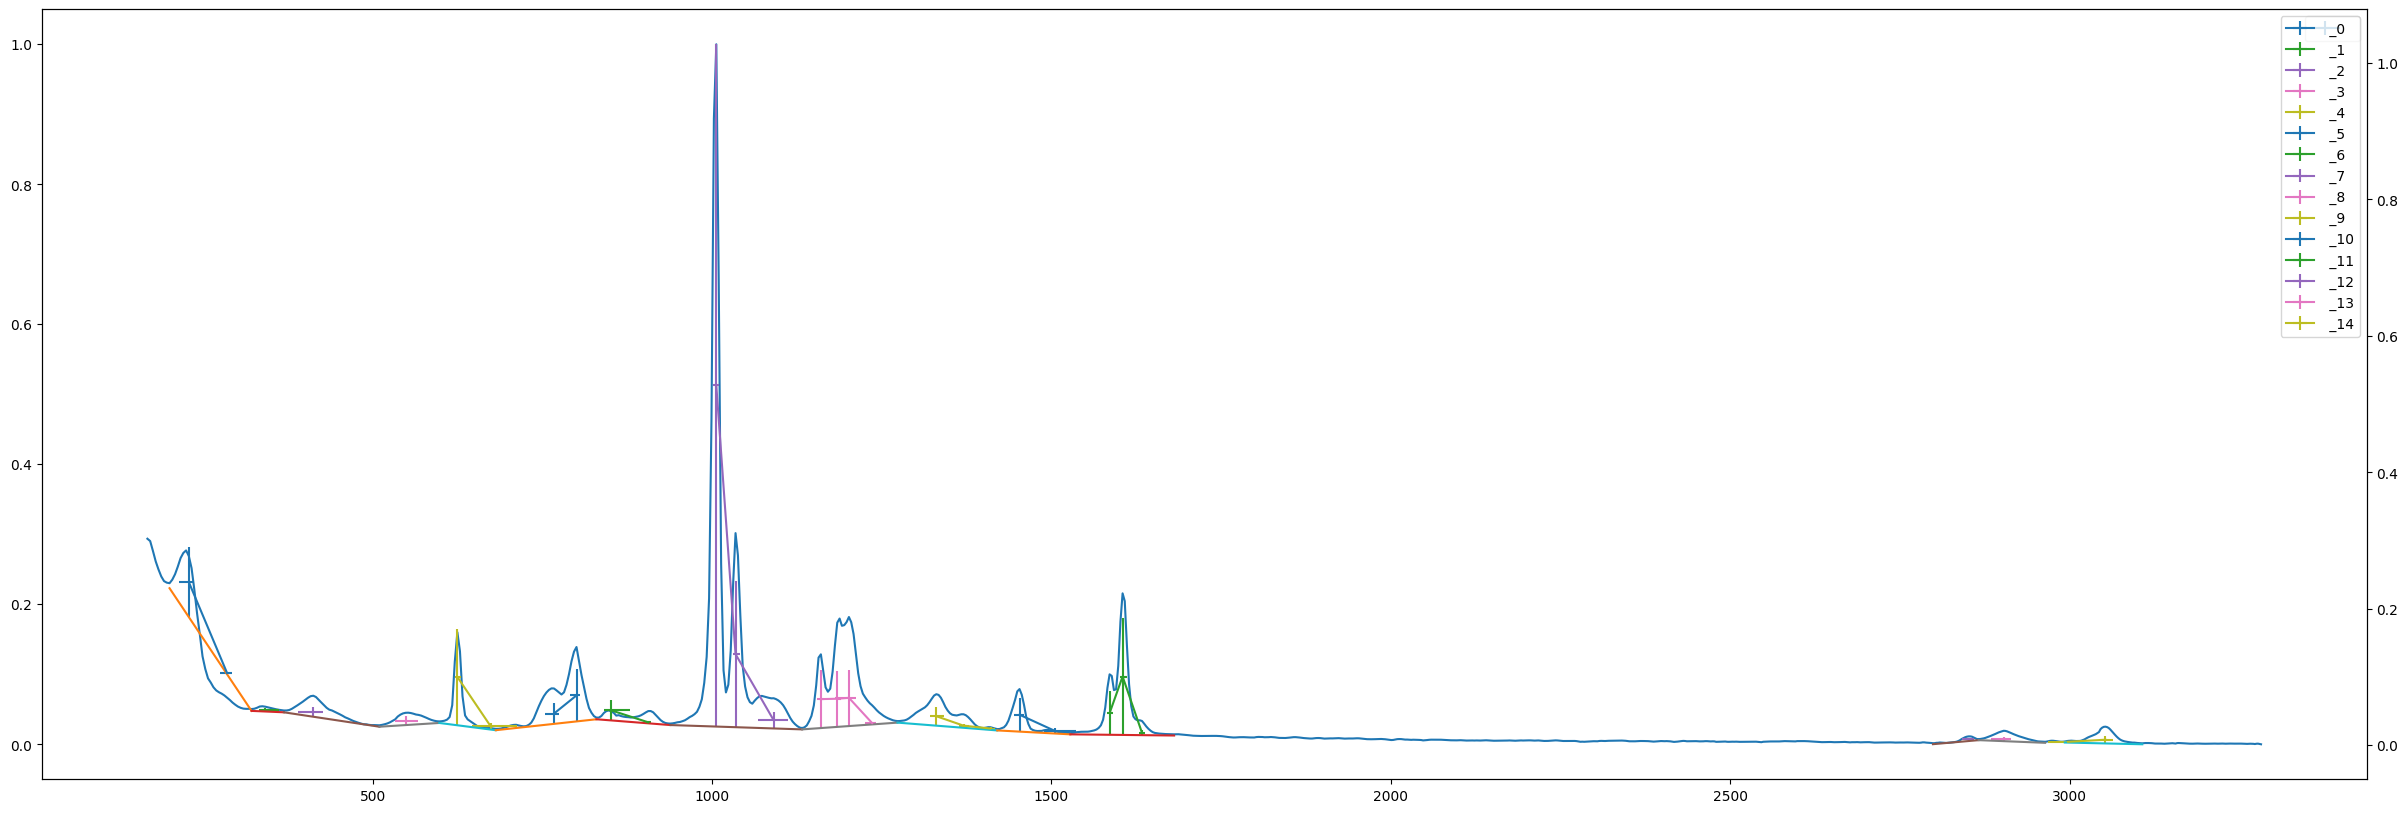

In [5]:
fig, ax = plt.subplots(figsize=(30, 10))
peak_candidates.plot(ax=ax.twinx())
spe.plot(ax=ax)

In [6]:
fitres = spe.fit_peak_multimodel(profile='Moffat', candidates=peak_candidates, no_fit=False)

<AxesSubplot: >

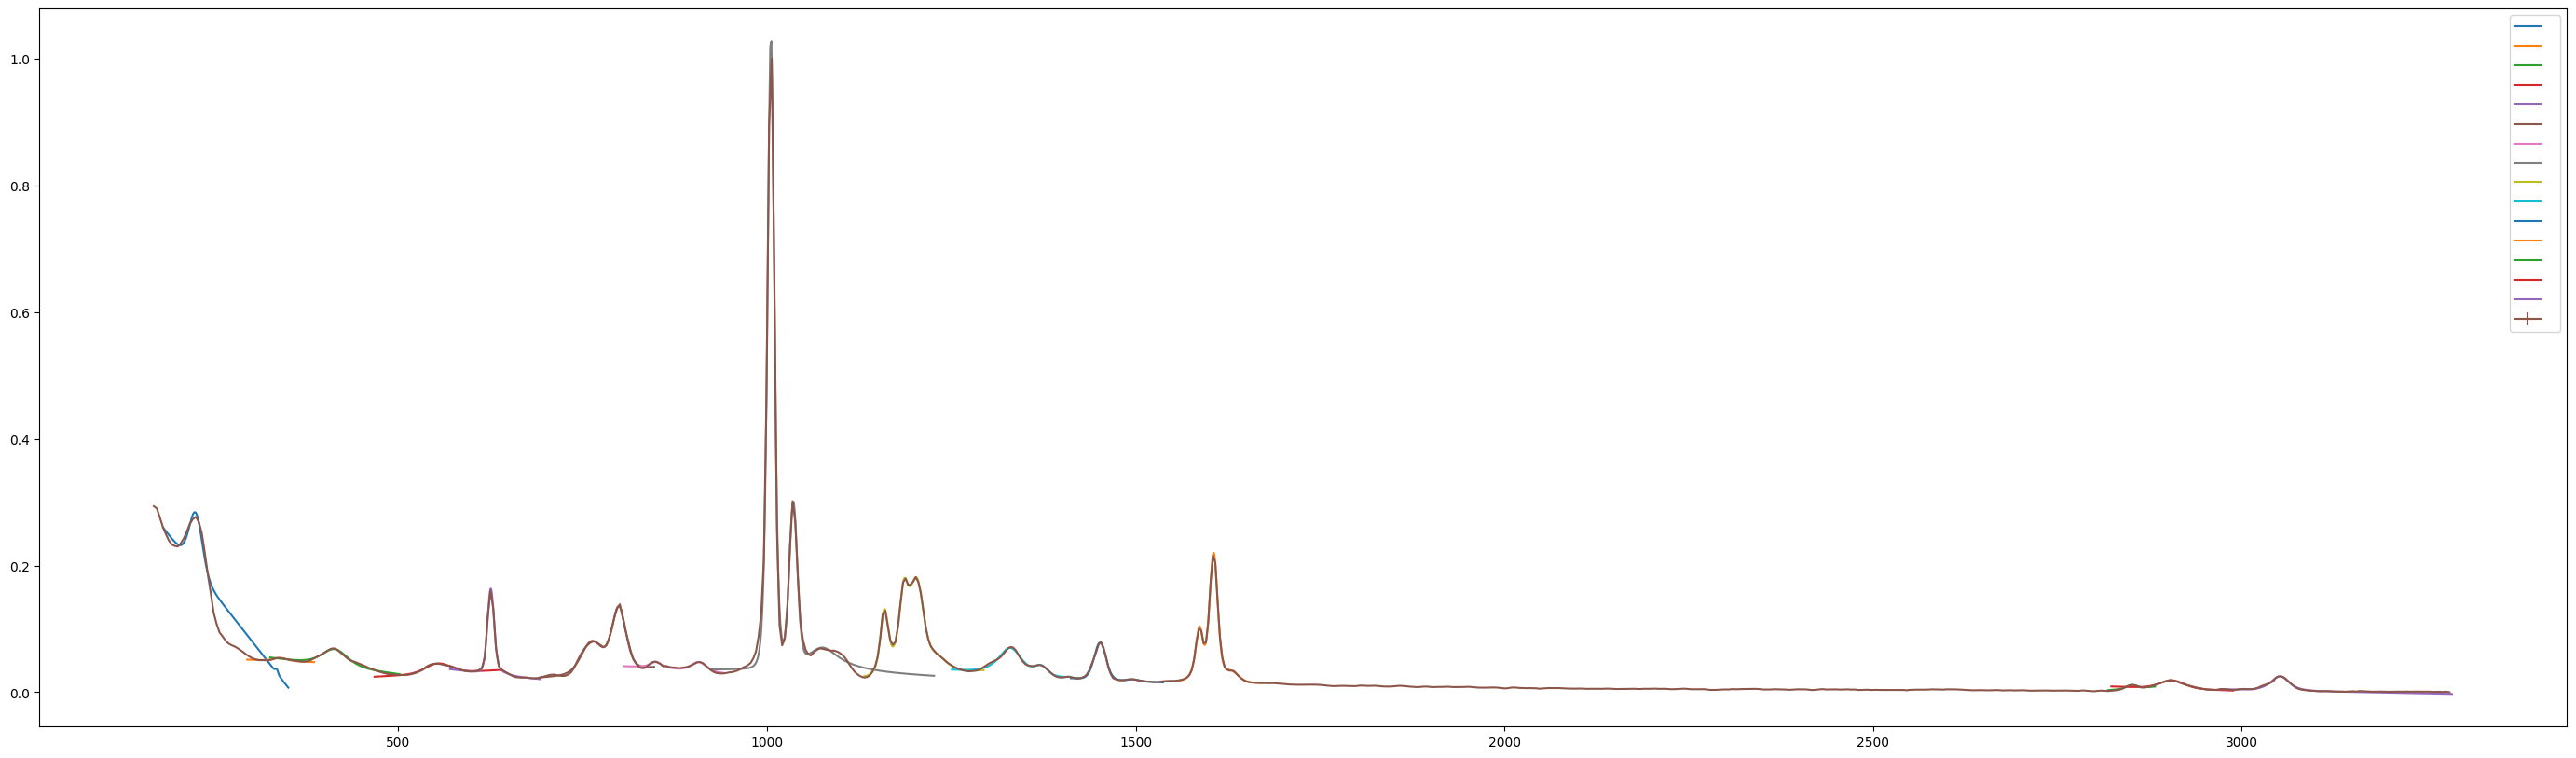

In [7]:
fig, ax = plt.subplots(figsize=(35, 10))
fitres.plot(ax=ax, individual_peaks=False)
#fitres.plot(ax=ax, peak_candidate_groups=peak_candidates, individual_peaks=False)
spe.plot(ax=ax)
#ax.set_xlim(0, 10000)
#ax.set_ylim(0, 1)

#line, = ax.plot([1,2,3,4])
#ax.plot([3,4,5,6], color=None)
#line.get_c()

In [8]:
fitres.boundaries()

[(182.7950761768531, 267.57492382314695),
 (300.0479354387068, 375.06406456129315),
 (346.2281714107234, 479.05382858927663),
 (466.3369378091753, 638.4390621908248),
 (601.3014838858035, 648.3845161141965),
 (684.6599507285612, 850.2080762420089),
 (810.918973663341, 948.136337939378),
 (982.2784946652827, 1141.3790796963883),
 (1123.7135072297594, 1279.5664927702408),
 (1263.4740475600327, 1397.3659524399675),
 (1413.7257986911238, 1517.4238388543536),
 (1571.8815878594291, 1634.5871066027153),
 (2243.9612783292096, 2425.7587216707907),
 (2458.1654766387737, 2749.414523361226),
 (2822.118868235714, 2884.8611317642853),
 (2832.765601208433, 2972.9343987915668),
 (2994.610017505003, 3110.589982494997)]

In [13]:
import numpy as np
np.array([np.array([v for k, v in peak.values.items() if k.endswith('fwhm')]) for peak in fitres], dtype=float )

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (17,) + inhomogeneous part.

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, fmt=':', label='spe')
    sharpened.plot(ax=a, fmt=':', label='sharpened')
    peak_candidates.plot(ax=a, label=None)



ax[0].set_xlim(900, 1300)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .5)

fig.suptitle('Peak candidates')

fit_res = spe.fit_peak_groups(model='Voigt', peak_candidate_groups=peak_candidates, no_fit=True)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 4), sharex='col', sharey='col')

spe.plot(ax=ax[0][0], fmt=':', label='spe')
spe.plot(ax=ax[0][1], fmt=':', label='spe')
spe.plot(ax=ax[1][0], fmt=':', label='spe')
spe.plot(ax=ax[1][1], fmt=':', label='spe')

spe.plot(ax=ax[0][2], fmt=':', label='spe')
spe.plot(ax=ax[1][2], fmt=':', label='spe')

fit_res.plot(ax=ax[0][0], label=None)
fit_res.plot(ax=ax[0][1], label=None)
fit_res.plot(ax=ax[0][2], label=None)
fit_res.plot(ax=ax[1][0], label=None, individual_peaks=True)
fit_res.plot(ax=ax[1][1], label=None, individual_peaks=True)
fit_res.plot(ax=ax[1][2], label=None, individual_peaks=True)

ax[0][0].set_xlim(900, 1300)
ax[0][1].set_xlim(1500, 1700)
ax[0][1].set_ylim(-.1, .4)
fig.suptitle('Initial guess')

In [ ]:
fit_res = spe.fit_peak_groups(model='Voigt', peak_candidate_groups=peak_candidates, no_fit=False)

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 4), sharex='col', sharey='col')

spe.plot(ax=ax[0][0], fmt=':', label='spe')
spe.plot(ax=ax[0][1], fmt=':', label='spe')
spe.plot(ax=ax[1][0], fmt=':', label='spe')
spe.plot(ax=ax[1][1], fmt=':', label='spe')

spe.plot(ax=ax[0][2], fmt=':', label='spe')
spe.plot(ax=ax[1][2], fmt=':', label='spe')

fit_res.plot(ax=ax[0][0], label=None)
fit_res.plot(ax=ax[0][1], label=None)
fit_res.plot(ax=ax[0][2], label=None)
fit_res.plot(ax=ax[1][0], label=None, individual_peaks=True)
fit_res.plot(ax=ax[1][1], label=None, individual_peaks=True)
fit_res.plot(ax=ax[1][2], label=None, individual_peaks=True)

ax[0][0].set_xlim(900, 1300)
ax[0][1].set_xlim(1500, 1700)
ax[0][1].set_ylim(-.1, .4)
fig.suptitle('Best fit')

In [ ]:
fit_res.to_csv('/tmp/fit_res.csv')

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 4))

cand = spe.find_peaks_bayesian_gaussian(n_samples=1000, moving_minimum_window=50, n_components=50, max_iter=300, trim_range=(950, 1400))
cand.plot(ax=ax)
spe.plot(ax=ax, fmt='r')
ax.set_xlim(900, 1500)